# Homework Assignment 1: Report on UN Happiness Data
### Rob Boswell
### Link to my GitHub Repository is: https://github.com/roboswell/Advanced_Machine_Learning/

---
**Instructions:**

Your report should include the following information:

*   Explore bivariate results (Use visualizations!)

*   Describe any relationships you see between particular features and the target variable

*   Examine features that predict happiness categories using one or more models that allow for automatic feature selection

*   Explain any meaningful findings

*   Run at least three prediction models to try to predict World Happiness well.

*   Discuss which models performed better and point out relevant hyper-parameter values for successful models.

*   Submit your best model to the leader board for the World Happiness AI Model

In [ ]:

!pip install scikit-learn --upgrade 
import os
os.environ['TF_KERAS'] = '1'
% tensorflow_version 1

     |████████████████████████████████| 22.2MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import os
from google.colab import drive 


drive.mount("/content/drive")



Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/Advanced_Machine_Learning_2nd_Semester/Assignment_1/

/content/drive/My Drive/Colab Notebooks/Advanced_Machine_Learning_2nd_Semester/Assignment_1


I begin by uploading my initial dataset, which includes from the original UN World Happiness dataset only the features: GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices, Generosity, and Perceptions of corruption. 

I also added many other variables, mostly from the 2019 Legatum Prosperity Index. The features from this index that I added to my dataset are measures of countries' performance in each given area. Although the index has rankings for countries in each area, I include the absolute scores of the variables (with higher scores being better) for each country in my dataset. The features I included from this index include:  

*  Adult Skills
*  Pre-Primary Education
*  Primary Education
*  Secondary Education
*  Tertiary Education
*  Government Effectiveness
*  Regulatory Quality (e.g. the level of ease with which companies can enter into and engage in the economy vs. regulatory burdens which may impede economic progress)
*  Rule of Law, Behavioural Risk Factors (i.e., measurements of life style risk levels which contribute to overall levels of health, and to the susceptibility to illness, injury, and death among the population of a given country)
*  Care Systems (the capacity of the given country to effectively respond to or cure illness once such diseases are already amongst the population)
*  Longevity (which includes multiple categories of mortality rates)
*  Mental Health (which measures the extent and magnitude of mental health conditions among thhe population)
*  Physical Health (which captures the extent and magnitude of physical health conditions affecting the population)
*  Preventative Interventions (which measures the level of capacity a country has to prevent illnesses and the spread of disease which could affect mortality rates.)
*  Contract Enforcement
*  Property Rights
*  Basic Services
*  Connectedness (which measures the ability of the population to engage in a range of normal activities, physically or digitially)
*  Material Resources (capturing the proportion of the population which has the minimum essential income/resources to survive and live well.
* Nutrition (which indicates the level to which diverse healthy food is available to the population)
* Protection from Harm
* Shelter
* Absence of Legal Discrimination
* Social Tolerance
* Politically Related Terror and Violence
* Property Crime
* Terrorism (captures the quantity of attacks, and injuries and fatalities in each country which have resulted, as well as the costs incurred by the economy as a result)
* Violent Crime
* War and Civil Conflict
* Civic and Social Participation
* Institutional Trust
* Interpersonal Trust
* Personal and Family Relationships (which measures the strength and closeness of such relationships, on average, in a given country)
* Social Networks (which measures the strength and closeness of relationships beyong family and friends)

Additionally, from other sources, I include the following features: 
* "Percent_of_pre-tax_nat_income_of_bottom_50%" - which measures the percent of national income in the hands of the bottom half of the population, and as such is a measure of economic inequality. Source: World Inequality Database
* Urban population (% of total population). Source: World Development Indicators, World Bank
* IHDI - The Inequality-Adjusted Human Development Index, based on data from UNDP
*  Never a time in past year without money for food (which is based on a worldwide survey question with respect to the last 12 months, for the most recent year up to 2019 in which the questions was asked in a given country). Source: Gallup Analytics
*  non-mil_gov_spending_as_percent_GDP: Source: SIPRI's dataset on military spending as a percentage of GDP, and a dataset on overall government spending as a percentage of GDP.  









---
---
# This report will proceed as follows: 
### **1)** I create an ElasticNet Logistic Regression model and XGBoost model, with parameters obtained primarily through GridSearchCV. 

* ### For each model, I describe hyperparameters which maximized accuracy.


### **2)** I plot charts of the feature importances from both the ElasticNet Logistic Regression and XGBoost models, and explain notable characteristics between the relationships of some of the features and the target variable. For the XGBoost model - I run a second model comprising some of the most important features in the first model to try to see if accuracy can be increased further. 


### **3)** I create a NN model using the most important features found by the XGBoost model, to see which of all the models achieves the highest predictive accuracy. 

### For the NN model, I describe the process by which I manually tuned for hyperparameters, and detail the hyperparameters that I used in my final NN model.
---

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("worldhappiness2019_v6.csv")

df.head()

,Happiness_level,name,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Adult Skills,Pre-Primary Education,Primary Education,Secondary Education,Tertiary Education,Government Effectiveness,Regulatory Quality,Rule of Law,Behavioural Risk Factors,Care Systems,Longevity,Mental Health,Physical Health,Preventative Interventions,Contract Enforcement,Property Rights,Basic Services,Connectedness,Material Resources,Nutrition,Protection from Harm,Shelter,Absence of Legal Discrimination,Social Tolerance,Politically Related Terror and Violence,Property Crime,Terrorism,Violent Crime,War and Civil Conflict,Civic and Social Participation,Institutional Trust,Interpersonal Trust,Personal and Family Relationships,Social Networks,Percent_of_pre-tax_nat_income_of_bottom_50%,Urban population (% of total population),IHDI,Never a time in past year without money for food,non-mil_gov_spending_as_percent_GDP
0,Very Low,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025,21.8,8.9,52.1,28.4,18.1,29.3,27.7,34.2,72.7,21.0,59.0,57.9,50.2,41.0,25.1,29.3,57.8,36.4,32.6,44.5,37.5,28.7,20.9,12.3,20.2,15.5,0.0,26.7,21.2,26.8,24.3,34.3,38.2,10.1,0.1873,25.754,0.334,0.28,0.258
1,Low,Albania,0.947,0.848,0.874,0.383,0.178,0.027,78.9,76.5,88.8,69.0,48.6,60.2,41.9,34.0,54.0,52.9,89.6,79.8,68.2,77.6,45.5,50.8,93.9,52.7,71.8,77.8,73.7,83.6,53.5,35.8,83.3,62.4,74.3,53.6,80.7,35.0,46.6,17.9,62.9,71.8,0.1931,61.229,0.670,0.53,0.280
2,Average,Algeria,1.002,1.160,0.785,0.086,0.073,0.114,56.3,72.4,86.3,65.4,37.6,39.4,34.7,44.7,58.4,58.2,86.2,70.3,69.5,82.3,39.9,45.2,90.4,55.9,83.4,84.9,62.1,86.6,32.4,10.4,80.6,68.2,91.5,60.7,86.6,23.5,48.9,28.3,64.8,52.0,0.2071,73.189,0.633,0.84,0.321
3,High,Argentina,1.092,1.432,0.881,0.471,0.066,0.050,75.0,75.9,90.3,68.9,53.2,59.2,39.0,39.1,51.1,74.5,87.5,67.4,74.8,87.6,57.5,51.5,97.6,61.0,76.9,83.1,81.1,91.0,68.7,67.3,62.5,50.0,99.7,43.7,97.1,12.0,28.1,29.4,88.1,77.4,0.1791,91.991,0.702,0.52,0.369
4,Low,Armenia,0.850,1.055,0.815,0.283,0.095,0.064,84.1,35.1,80.3,74.0,46.2,43.7,46.4,43.4,57.8,65.0,84.8,76.1,68.6,83.5,61.0,63.9,98.0,59.7,71.3,79.9,69.1,84.6,50.4,32.8,67.0,79.6,93.1,63.2,79.5,27.6,46.8,40.4,71.9,75.3,0.2024,63.219,0.679,0.62,0.186


In [ ]:
# Clean up final region data
y = df['Happiness_level']
X = df.drop(['Happiness_level', 'name'], axis=1)


X.shape, y.shape

((156, 45), (156,))

In [ ]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(104, 45)
(104,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Adult Skills', 'Pre-Primary Education', 'Primary Education', 'Secondary Education', 'Tertiary Education', 'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', 'Behavioural Risk Factors', 'Care Systems', 'Longevity', 'Mental Health', 'Physical Health', 'Preventative Interventions', 'Contract Enforcement', 'Property Rights', 'Basic Services', 'Connectedness', 'Material Resources', 'Nutrition', 'Protection from Harm', 'Shelter', 'Absence of Legal Discrimination', 'Social Tolerance', 'Politically Related Terror and Violence', 'Property Crime', 'Terrorism', 'Violent Crime', 'War and Civil Conflict', 'Civic and Social Participation', 'Institutional Trust', 'Interpersonal Trust', 'Personal and Family Relationships', 'Social Networks', 'Percent_of_pre-tax_nat_income_of_bottom_50%', 'Urban population (% of total population)', 'I

In [ ]:
#feature_names = X_train.columns
#print(feature_names)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
#numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#categorical_features = ['region']
categorical_features = []

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
preprocess = preprocessor.fit(X_train) 

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(df):
    preprocessed_data=preprocess.transform(df)
    return preprocessed_data

In [ ]:

preprocessor(X_train).shape 

(104, 45)

# Model 1: ElasticNet Logistic Regression:
---

In [ ]:
# ElasticNet Logistic Regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

en_pipe = make_pipeline(ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]), LogisticRegression(penalty = 'elasticnet', solver = 'saga', class_weight='balanced', random_state=42))



In [ ]:
import numpy as np

from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': np.arange(0.1, 3.0, 0.1),
    'logisticregression__l1_ratio': np.arange(0.01, 0.5, 0.05),
    'logisticregression__max_iter': np.arange(500, 5000, 200),    
    }
grid = GridSearchCV(en_pipe, param_grid, cv=10)

In [ ]:
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was rea

best mean cross-validation score: 0.5964
best parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.11, 'logisticregression__max_iter': 500}


In [ ]:
model_en = LogisticRegression(C= 0.1, penalty='elasticnet', solver='saga', l1_ratio=0.11, max_iter=500, random_state=42) 
model_en.fit(preprocessor(X_train), y_train)
model_en.score(preprocessor(X_train), y_train)

0.7307692307692307

In [ ]:
y_pred = model_en.predict(preprocessor(X_test))
y_pred

array(['Very Low', 'Average', 'Low', 'Average', 'Very High', 'Low',
       'Very Low', 'Very High', 'Low', 'Very Low', 'Very Low', 'Average',
       'Average', 'Very Low', 'Very Low', 'Very Low', 'Low', 'Very Low',
       'Average', 'Very Low', 'Very High', 'Average', 'Very Low',
       'Very Low', 'Very Low', 'Very High', 'Average', 'Very High',
       'High', 'Very Low', 'Low', 'Very High', 'Average', 'Average',
       'Average', 'Very Low', 'Very High', 'High', 'Very Low',
       'Very High', 'Very Low', 'Very Low', 'Very Low', 'Very High',
       'High', 'Very Low', 'Very High', 'Very High', 'Very High',
       'Very Low', 'Very High', 'High'], dtype=object)

In [ ]:
# Evaluate held out test data
from sklearn.metrics import accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 50.00%


**Answer:** As seen above, for the ElasticNet model, I used GridSearchCV to tune for C between the values of 0.1 to 3, by increments of 0.1. I also tuned for the l1_ratio between 0.01 and 0.5. I further tuned for max_iter between the range of 500 and 5000, in increments of 200. GridSearchCV found that the optimal values for maximizing accuracy was a C value of 0.1, a max_iter of 500, and an l1_ratio of 0.11. My accuracy score was 50%



---
### Feature Importance:

---

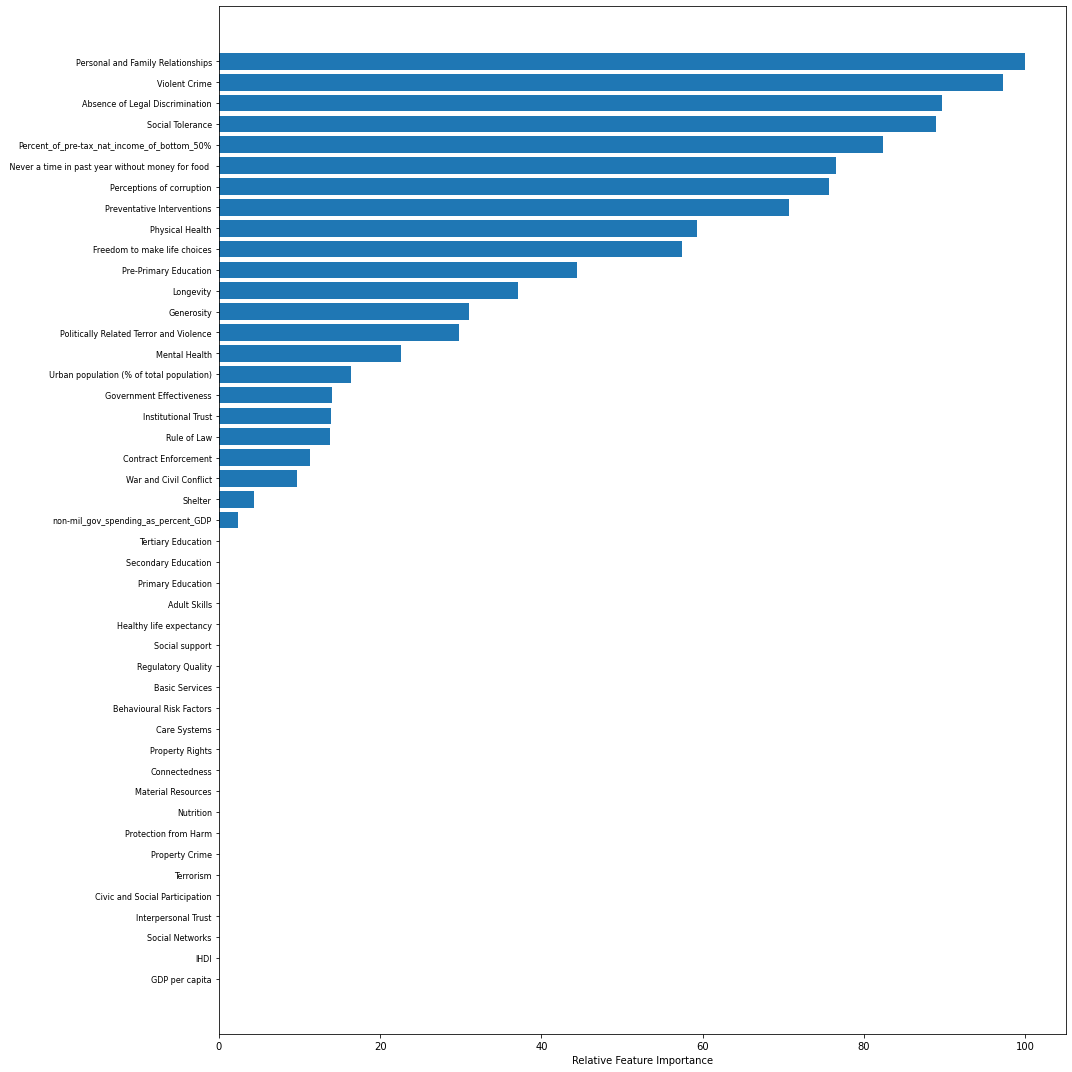

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


feature_importance = abs(model_en.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(15,15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()  
 
plt.show()

**Results:**

From the above chart, we can see that the 4 features that matter the most include: **"Personal and Family Relationships"**, **"Violent Crime"**, **"Absence of Legal Discrimination"**, and **"Social Tolerance"**.

I find these best features for the ElasticNet model very interesting. While the most important features for the XGBoost model (further below) seem primarily focused on resources necessary for survival, instead the ElasticNet model's best features appear geared towards one's social well-being, with perhaps the one exception being "Violent Crime". Still, violent crime does impact emotional well-being, which is likely tied to social-wellbeing.

---
# Model 2: XGBoost:
---

In [ ]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier, plot_importance

xgb_pipe = make_pipeline(ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]), XGBClassifier(random_state=42))

In [ ]:
#XGBoost:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbclassifier__learning_rate': np.arange(0.001, 0.06, 0.005),
    'xgbclassifier__n_estimators': np.arange(100, 2300, 200),
    'xgbclassifier__max_depth': np.arange(1, 4)    
    }
grid = GridSearchCV(xgb_pipe, param_grid, cv=10)

In [ ]:
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.5964
best parameters: {'xgbclassifier__learning_rate': 0.006, 'xgbclassifier__max_depth': 1, 'xgbclassifier__n_estimators': 1500}


In [ ]:
model = XGBClassifier(learning_rate= 0.006, max_depth=1, n_estimators=1500, random_state=42) 
model.fit(preprocessor(X_train), y_train)
model.score(preprocessor(X_train), y_train)

0.9615384615384616

In [ ]:
y_pred = model.predict(preprocessor(X_test))
y_pred

array(['Average', 'Average', 'Very Low', 'Average', 'Very High',
       'Very Low', 'Very Low', 'Very High', 'Very Low', 'Very Low',
       'Very Low', 'Average', 'Average', 'Very Low', 'Very Low',
       'Very Low', 'Very Low', 'Very Low', 'Average', 'Low', 'Very High',
       'High', 'Very Low', 'Low', 'Very Low', 'High', 'Average',
       'Very High', 'Average', 'Very Low', 'Very Low', 'Very High',
       'Average', 'Average', 'High', 'Very Low', 'Very High', 'High',
       'Very Low', 'High', 'Very Low', 'Average', 'Very Low', 'Very High',
       'High', 'Very Low', 'Very High', 'Very High', 'Very High',
       'Very Low', 'Very High', 'High'], dtype=object)

In [ ]:
# Evaluate held out test data
from sklearn.metrics import accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 51.92%


---
**Answer:** As seen above, for XGBoost, I used GridSearchCV to tune for the hyperparameters of the learning_rate between the values of 0.001 and 0.06, in increments of 0.005, for n_estimators (which is the number of gradient boosted trees) between the values of 100 and 2300, in increments of 200, and for max_depth (which is the maximum tree depth in terms of the maximum number of levels of nodes in which a new split can be made) between the values of 1 and 4. 

Through tuning, GridSearchCV found the optimal **learning_rate** to be  0.006, the optimal value for **max_depth** to be 1, and the optimal value for **n_estimators** to be 1500. 

The accuracy rate achieved with these hyperparameter values was: **51.92%**

---

I next proceed to find the feature importances of the above XGBoost model:

---


### Feature Importance:

In [ ]:
model.feature_importances_

array([0.04636122, 0.04224193, 0.02131577, 0.01892326, 0.        ,
       0.03940601, 0.        , 0.        , 0.01093764, 0.01133078,
       0.04088422, 0.02717837, 0.        , 0.10072395, 0.01509451,
       0.00910423, 0.03819256, 0.03356207, 0.0513771 , 0.        ,
       0.        , 0.02257751, 0.        , 0.        , 0.1417669 ,
       0.0382552 , 0.02624613, 0.        , 0.        , 0.02889504,
       0.01436181, 0.01397623, 0.03565188, 0.        , 0.01841658,
       0.        , 0.02385472, 0.00951792, 0.0253501 , 0.01112198,
       0.01304828, 0.03023171, 0.0155251 , 0.01252678, 0.01204246],
      dtype=float32)

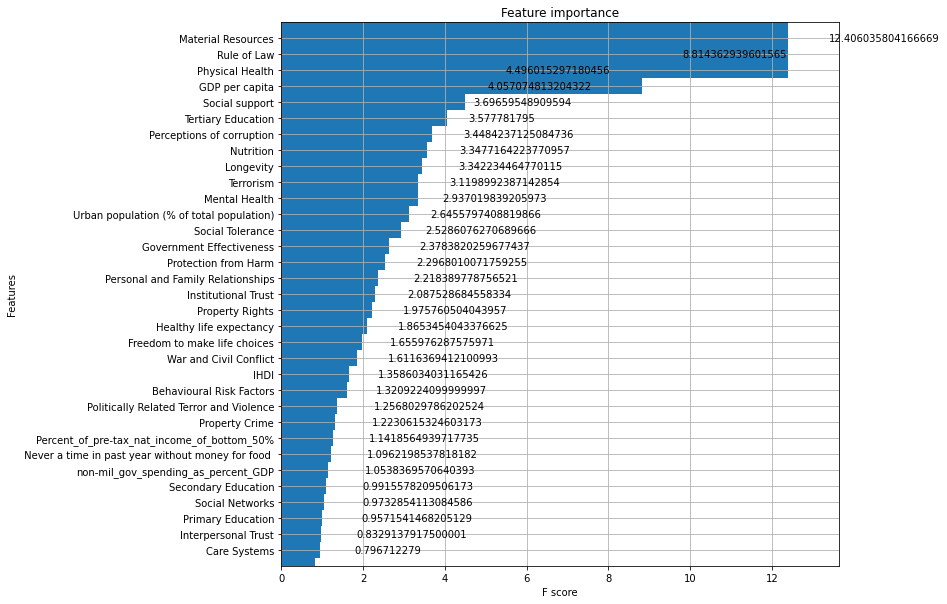

In [ ]:
# plot feature importance
import xgboost
from xgboost import plot_importance

model.get_booster().feature_names = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Adult Skills', 'Pre-Primary Education', 'Primary Education', 'Secondary Education', 'Tertiary Education', 'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', 'Behavioural Risk Factors', 'Care Systems', 'Longevity', 'Mental Health', 'Physical Health', 'Preventative Interventions', 'Contract Enforcement', 'Property Rights', 'Basic Services', 'Connectedness', 'Material Resources', 'Nutrition', 'Protection from Harm', 'Shelter', 'Absence of Legal Discrimination', 'Social Tolerance', 'Politically Related Terror and Violence', 'Property Crime', 'Terrorism', 'Violent Crime', 'War and Civil Conflict', 'Civic and Social Participation', 'Institutional Trust', 'Interpersonal Trust', 'Personal and Family Relationships', 'Social Networks', 'Percent_of_pre-tax_nat_income_of_bottom_50%', 'Urban population (% of total population)', 'IHDI', ' Never a time in past year without money for food ', 'non-mil_gov_spending_as_percent_GDP']
ax = xgboost.plot_importance(model.get_booster(), height=5, importance_type = 'gain')
fig = ax.figure
fig.set_size_inches(10, 10)




**Results:**

* The above chart shows that in terms of XGBoost's feature importance measurement of 'gain', the features **"Material Resources"**, **"Rule of Law"**, **"Physical Health"**, and **"GDP per capita"** are the __4 most important features__ in the dataset. According to the XGBoost online documentation, "gain" is defined as "the average gain of splits which use the feature."

* I find it fascinating that the features which would predict human happiness the most have little to do with characteristics often thought of as being predictive of happiness, such as personal and family relationships, whether there is war and conflict, or even terrorism occuring in an individual's country, being able to trust others, or the crime rate. 

* According to the XGBoost feature importance results, the primary features predictive of happiness instead have more to do with the basic essentials for living. Having the material resources necessary to survive, having law and order for crimes applied impartially and effectively, having good health, and the size of the economy per capita.



Text(0, 0.5, 'Level of Happiness')

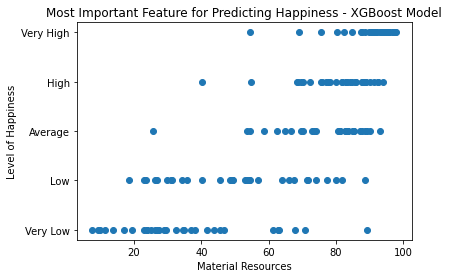

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Material Resources'], df['Happiness_level'])
plt.title("Most Important Feature for Predicting Happiness - XGBoost Model")
plt.xlabel("Material Resources")
plt.ylabel("Level of Happiness")

**Results:**

The scatterplot shows a fairly distinct trend, whereby as countries have more material resources, their populations' level of happiness tends to increase. There are some outliers in all 5 cateogories of level of happiness, but it appears that as you increase level of happiness there are fewer outliers of countries' amounts of material resources. E.g., in the very low category of happiness, while most countries' material resources appear to cluster between 0 and 50 - there are 5 noticeable outliers betwen 60 and 90. However, for the very high category of level of happiness, most countries cluster around having between a material resources score of about 80 to 100, with 3 outliers between 50 to 80. This trend in numbers outliers of material resources outliers narrowing as levels of happiness increase may also be a result of the fact that there are more countries which have very low levels of happiness than countries which have very high levels of happiness. 

Text(0, 0.5, 'Level of Happiness')

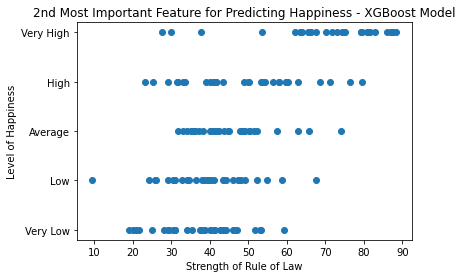

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Rule of Law'], df['Happiness_level'])
plt.title("2nd Most Important Feature for Predicting Happiness - XGBoost Model")
plt.xlabel("Strength of Rule of Law")
plt.ylabel("Level of Happiness")

**Results:**

The scatterplot showing countries' strength of rule of law scores compared to their levels of happiness, while having a slightly less clear trend, does show that in general as countries' strength of rule of law scores increase, the countries' level of happiness also increases. Countries having a very low level of happiness have rule of law scores that cluster mostly between 20 and about 48, while countries having very high levels of happiness cluser around rule of law scores between 60 and 90. There seems to be a lot more variation in strength of rule of law among countries that are in the high level of happiness category than any of the other levels of happiness categories. It is also interesting that there are 3 country outliers that have a very high level of happiness yet have rule of law scores below 40.

Text(0, 0.5, 'Level of Happiness')

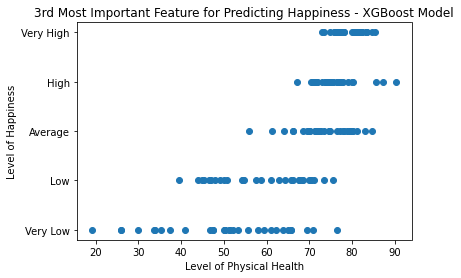

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Physical Health'], df['Happiness_level'])
plt.title("3rd Most Important Feature for Predicting Happiness - XGBoost Model")
plt.xlabel("Level of Physical Health")
plt.ylabel("Level of Happiness")

**Results:**

We see a moderately distinct trend whereby as level of physical health increase, level of happiness also increases. With regards to level of physical health, we again see a very noticeable trend of having fewer outliers from primary clusters of countries the higher the level of happiness of those countries. It is somewhat interesting that countries having a very low level of happiness have a primary cluster of countries between about 48 and 68, whereas in the low level of happiness category, the primary clusters go as low as about 42. It is also interesting that it appears that the 3 countries having the highest scores for level of physical health are all located in the high category for level of happiness rather than the very high category.

Text(0, 0.5, 'Level of Happiness')

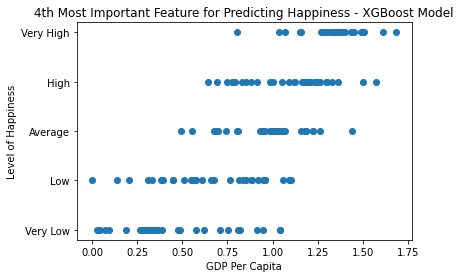

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['GDP per capita'], df['Happiness_level'])
plt.title("4th Most Important Feature for Predicting Happiness - XGBoost Model")
plt.xlabel("GDP Per Capita")
plt.ylabel("Level of Happiness")

**Results:**

We see a pretty clear trend once again, that countries with higher levels of happiness tend to have higher GDPs per capita. It is interesting that it appears that within each category for level of happiness, there are roughly equal numbers of countries with respect to GDP per capita. There definitely seems to be a broader range for the feature scores for each level of happiness than for the previous 3 higher ranked best feature scatterplots above.

---
---
### Revised XGBoost Model Based only on Important Features:

---
---


Below, I use XGBoost again, but this time with only the top 4 features. As seen below, accuracy increases from 51.92% to **53.85%**. 

---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("worldhappiness2019_v6_XGBoost_best_features_gain.csv")

df.head()

,Happiness_level,name,Rule of Law,Material Resources,GDP per capita,Physical Health
0,Very Low,Afghanistan,34.2,32.6,0.350,50.2
1,Low,Albania,34.0,71.8,0.947,68.2
2,Average,Algeria,44.7,83.4,1.002,69.5
3,High,Argentina,39.1,76.9,1.092,74.8
4,Low,Armenia,43.4,71.3,0.850,68.6


In [ ]:
# Clean up final region data
y = df['Happiness_level']
X = df.drop(['Happiness_level', 'name'], axis=1)


X.shape, y.shape

((156, 4), (156,))

In [ ]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(104, 4)
(104,)
['Rule of Law', 'Material Resources', 'GDP per capita', 'Physical Health']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
#numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#categorical_features = ['region']
categorical_features = []

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
preprocess = preprocessor.fit(X_train) 

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(df):
    preprocessed_data=preprocess.transform(df)
    return preprocessed_data

In [ ]:

preprocessor(X_train).shape 

(104, 4)

In [ ]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier, plot_importance

xgb_pipe = make_pipeline(ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]), XGBClassifier(random_state=42))

In [ ]:
#XGBoost:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbclassifier__learning_rate': np.arange(0.001, 0.06, 0.005),
    'xgbclassifier__n_estimators': np.arange(100, 2300, 200),
    'xgbclassifier__max_depth': np.arange(1, 4)    
    }
grid = GridSearchCV(xgb_pipe, param_grid, cv=10)

In [ ]:
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.6255
best parameters: {'xgbclassifier__learning_rate': 0.006, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 1300}


In [ ]:
model = XGBClassifier(learning_rate= 0.006, max_depth=3, n_estimators=1300, random_state=42) 
model.fit(preprocessor(X_train), y_train)
model.score(preprocessor(X_train), y_train)

1.0

In [ ]:
y_pred = model.predict(preprocessor(X_test))
y_pred

array(['Low', 'Average', 'Very Low', 'Average', 'Very High', 'Very Low',
       'Very Low', 'Very High', 'Very Low', 'Very Low', 'Very Low', 'Low',
       'Very Low', 'Very Low', 'Very Low', 'Low', 'Very Low', 'Very Low',
       'High', 'Very Low', 'Very High', 'Average', 'Very Low', 'Low',
       'Very Low', 'High', 'High', 'Very High', 'High', 'Low', 'Very Low',
       'Very High', 'Average', 'Average', 'High', 'Very Low', 'Very High',
       'High', 'Very Low', 'High', 'Average', 'Average', 'Very Low',
       'Very High', 'High', 'Low', 'Very High', 'Very High', 'Very High',
       'Average', 'Very High', 'High'], dtype=object)

In [ ]:
# Evaluate held out test data
from sklearn.metrics import accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 53.85%


**Results:**

As shown above, I tune for the same hyperparameters as before and for the same range of values for each hyperparameter as before. However, this time, the best hyperparameters are: a learning_rate of 0.006, max_depth of 3, and 1300 n_estimators (gradient boosted trees). Accuracy: 53.85%

---
# Model 4: Fully Connected Neural Networks:
---

In [ ]:
# Check shape for keras input:
preprocessor(X_train).shape # pretty small dataset

(104, 4)

In [ ]:
# Check shape for keras output:
pd.get_dummies(y_train).shape

(104, 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,BatchNormalization
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu', kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01), bias_regularizer=l1_l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(.25))
model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# save best model given maximum val_accuracy, stop early if loss does not improve after 200 further iterations beyond best loss
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(preprocessor(X_train), pd.get_dummies(y_train), batch_size=32,
          validation_data=(preprocessor(X_test), pd.get_dummies(y_test)), epochs=1000, verbose=1, callbacks=[es,mc])

Train on 104 samples, validate on 52 samples
Epoch 1/1000
104/104 [==============================] - 1s 10ms/step - loss: 12.8293 - accuracy: 0.2115 - val_loss: 12.1994 - val_accuracy: 0.2308

Epoch 00001: val_accuracy improved from -inf to 0.23077, saving model to best_model.h5
Epoch 2/1000
104/104 [==============================] - 0s 322us/step - loss: 12.5989 - accuracy: 0.2788 - val_loss: 12.1222 - val_accuracy: 0.2308

Epoch 00002: val_accuracy did not improve from 0.23077
Epoch 3/1000
104/104 [==============================] - 0s 321us/step - loss: 12.3148 - accuracy: 0.4038 - val_loss: 12.0521 - val_accuracy: 0.3462

Epoch 00003: val_accuracy improved from 0.23077 to 0.34615, saving model to best_model.h5
Epoch 4/1000
104/104 [==============================] - 0s 335us/step - loss: 12.1283 - accuracy: 0.4038 - val_loss: 11.9899 - val_accuracy: 0.4038

Epoch 00004: val_accuracy improved from 0.34615 to 0.40385, saving model to best_model.h5
Epoch 5/1000
104/104 [================

In [ ]:
model = load_model('best_model.h5')

#Now we have automated model building such that we can choose the best model evaluated on test data 
#throughout the model building process!


# using predict_classes() for multi-class data to return predicted class index.

prediction_index=model.predict_classes(preprocessor(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))


# load model_eval_metrics() function into our session to calculate metrics

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

model_eval_metrics( y_test,predicted_labels,classification="TRUE")


# add metrics to submittable object
modelevalobject=model_eval_metrics( y_test,predicted_labels,classification="TRUE")

modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.692308,0.670553,0.673893,0.688333,0,0,0,0


**Results:** 

Unlike the other models, I manually tuned the NN model. Initially, I started with 3 hidden layers, each with 64 neurons, with a kernal_regularizer and bias_regularizer for each hidden layer, all set to l1_l2(0.3) regularization. I also started (and ended) with EarlyStopping and ModelCheckoint. Initially, I set EarlyStopping at 200 epochs (without decreases in loss), but I eventually experimented with increasing early stopping, ending up at 400 epochs, as I noticed that overfitting might occur with some of the epochs near the end, but that ModelCheckpoint would save my highest cross-validated accuracy score. This meant that the model obtained through ModelCheckpoint would not suffer from overfitting. With this in mind, I increased my original total number of epochs from 500 to 1000 to allow for added potential to obtain a higher cross-validated accuracy score than I likely would have achieved had I kept my epochs at 500.

Gradually, I began addding additional parameters, including BatchNormalization() and Dropout() to each hidden layer. Initially, Dropout was set to 0.3 for each hidden layer. I wasn't getting the accuracy I hoped for, and so I began to decrease it, ending with a noticeable increase in accuracy as I reached 0.1. My initial batch size was 50, but I experimented by increasing gradually, then decreasing it, and finally found a batch_size of 32 to seem to increase maximize the accuracy I was getting. Ultimately, I ended up with an accuracy score of 0.692308, an f1_score of 0.670553, precision of 0.673893, and recall of 0.688333.  

**Summary:**

My top performing model by far was my Fully Connected Neural Network model, which achieved an accuracy score of 69.23%, followed by my revised XGBoost model with an accuracy score of 53.85% (based on the top 4 features found by my original XGBoost model). My third best model was my original XGBoost model (having an accuracy score of 51.92%), followed by my EslasticNet Logistic Regression model, which had an accuracy score of 50%.

In [2]:
pip install folium==0.2.1



SyntaxError: ignored

In [ ]:
pip install urllib3==1.25.10

     |████████████████████████████████| 133kB 5.4MB/s 
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/
Requirement already up-to-date: aimodelshare in /usr/local/lib/python3.6/dist-packages (0.0.26)


In [ ]:
#Save preprocessor function to local "preprocessor.zip" file for leaderboard submission
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

In [ ]:
#test your preprocessor
prep=ai.import_preprocessor("preprocessor.zip")
prep(X_test)

array([[ 1.14626063, -0.64246408, -0.1688832 , -1.24575693],
       [ 0.04190434,  0.76161782,  0.64507844,  0.62223698],
       [-1.05651455, -2.60044985, -1.84387229, -1.49593468],
       [-0.36777622,  0.88613884,  0.13012312,  0.58054069],
       [ 1.06313704,  0.87755119,  2.05982129,  0.54718366],
       [-1.11588855, -0.91297527, -1.84387229, -1.15402508],
       [-0.70027059, -2.12812872, -2.03767268, -2.12137907],
       [ 2.24467952,  1.26828957,  1.23755392,  1.0808962 ],
       [ 0.19033932,  0.09178058, -0.3848322 , -0.45352737],
       [-0.6230844 , -1.90055581, -1.84110371, -1.82950502],
       [-0.48058681, -1.6429261 , -1.6860634 , -1.56264875],
       [-0.45683721,  0.56839554, -0.70598714, -0.06992148],
       [-0.27871523,  0.95054627,  0.01384289,  0.06350666],
       [-1.43650812, -1.76744713, -2.60246239, -0.54525921],
       [-1.20494954, -2.42869671, -2.53047938, -3.63078486],
       [-1.05651455, -1.58710633, -0.73921006, -1.90455835],
       [-0.06496885, -1.

In [ ]:
#Save keras model object to onnx file

from aimodelshare.aimsonnx import model_to_onnx
# transform sklearn model to ONNX
onnx_model_keras= model_to_onnx(model, framework='keras', 
                                   transfer_learning=False,
                                   deep_learning=True,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_keras.onnx", "wb") as f:
    f.write(onnx_model_keras.SerializeToString())

The ONNX operator number change on the optimization: 32 -> 12


In [ ]:
#aimodelshare username and password
username = "rboswell"
password = "------"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [ ]:
# test submit_model()
ai.submit_model("onnx_model_sklearn.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels,
                preprocessor="preprocessor.zip")

In [ ]:
# Check leaderboard
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
data

In [ ]:
ai.stylize_leaderboard(data, category="classification")